In [101]:
from matplotlib import pyplot as plt
from tueplots import bundles
import numpy as np
from matplotlib.patches import Ellipse
import sys
sys.path.append("../")
from src import data, pca

In [20]:
plt.rcParams.update(bundles.neurips2021(usetex=False))

In [2]:
pop_songs, non_pop_songs = data.get_split_dfs(drop_columns=['popularity', 'key', 'id', 'name'])

In [5]:
dat_pca = pop_songs.append(non_pop_songs)
dat_pca = dat_pca.dropna()

In [6]:
eigenvalues, eigenvectors = pca.PCA(dat_pca)

In [44]:
dat_pca_z = (dat_pca-dat_pca.mean(axis=0)) / dat_pca.std(axis=0)


pop_proj = np.asarray(dat_pca_z)[:70,] @ eigenvectors[:,:2]
non_pop_proj = np.asarray(dat_pca_z)[70:,] @ eigenvectors[:,:2]

pc1 = eigenvalues[0] * eigenvectors[:,0]
pc2 = eigenvalues[1] * eigenvectors[:,1]

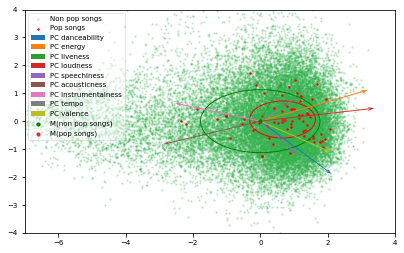

In [122]:
plt.figure()
plt.xlim(-7, 4)
plt.ylim(-4, 4)

# plot data points
s = 2
plt.scatter(non_pop_proj[:,0], non_pop_proj[:,1], s=s, color=(0.2, 0.7, 0.3, 0.2), label="Non pop songs")
plt.scatter(pop_proj[:,0], pop_proj[:,1], s=s, color=(1, 0, 0, 1), label="Pop songs")

# add mahalanobis unit circle per group
non_pop_mean = np.mean(non_pop_proj, axis=0)
pop_mean = np.mean(pop_proj, axis=0)

ax = plt.gca()
pop_var = np.std(pop_proj, axis=0)
ax.add_patch(Ellipse((pop_mean[0], pop_mean[1]),2*pop_var[0],2*pop_var[1], facecolor='none', edgecolor='red'))
non_pop_var = np.std(non_pop_proj, axis=0)
ax.add_patch(Ellipse((non_pop_mean[0], non_pop_mean[1]),2*non_pop_var[0],2*non_pop_var[1], facecolor='none', edgecolor='green'))

# plot PCs
num_vecs = pc1.shape[0]
Q = [0] * num_vecs
for i in range(num_vecs):
    Q[i] = plt.quiver(0, 0, pc1[i], pc2[i], scale=5, headwidth=5, headlength=8, width=0.0025, label=f'PC {pop_songs.columns[i]}', color=plt.cm.tab10.colors[i])

# plot Means

plt.scatter(*non_pop_mean, color=(0, 0.5, 0, 1), marker="o", s=10, label="M(non pop songs)")
plt.scatter(*pop_mean, color=(0.8, 0.2, 0.2, 1), marker="o", s=10, label="M(pop songs)")



# add legend
plt.legend(framealpha=0.5)

plt.savefig("001_pca.pdf")
plt.show()


0.9765244484603928